In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 40,30
from sklearn.model_selection import train_test_split
from pandas.tseries.offsets import Day
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
#from pyramid.arima import auto_arima
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from math import sqrt
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [2]:
#----------read csv file----------
#info = pd.read_csv('distribution.csv')
info = pd.read_csv('product_distribution_training_set.txt', sep='\t',header=None)

#set a dataframe for the data
#data = pd.DataFrame(data=info)

#---------interchange the row and column of the data i.e transpose------------
data_transposed1 = info.T

#---------remove header---------
product_id=data_transposed1.iloc[0]
data_transposed=data_transposed1.drop(data_transposed1.index[0])
#print(data_transposed)

warnings.filterwarnings("ignore") # specify to ignore warning messages

#----------Check Statinarity----------
series_Statinarity = Series.from_csv('product_distribution_training_set.txt', sep='\t',header=None)
series_Statinaritya=series_Statinarity
X_Statinaritya = series_Statinaritya.values
X_Statinarity=X_Statinaritya
result = adfuller(X_Statinarity)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
	#print('\t%s: %.3f' % (key, value))




ADF Statistic: -4.641743


In [3]:
#----------Plot data----------
#plt.xlabel("DAY")
#plt.ylabel("QUANTITY")

#plt.plot(data_transposed)

In [19]:
#----------Split into training and testing----------
training=data_transposed[0:100]
testing=data_transposed[100:118]

product = data_transposed.iloc[0:118,99].copy()


In [5]:
#----------Plot seasonal----------
#for column in training:
 #   result = seasonal_decompose(training[column], model='additive',freq=7)
 #   print("Product")
 #   print(column)
 #   result.plot()
 #   pyplot.show()
    


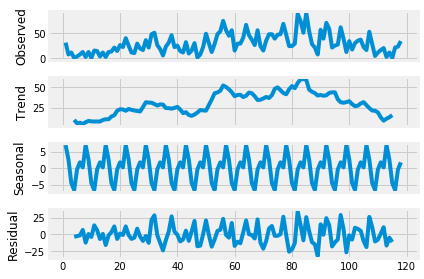

In [6]:
#resulta = seasonal_decompose(product, model='additive',freq=7)
#resulta.plot()
#pyplot.show()

In [4]:
#----------find total of all train products on each day----------
train_sum1= training.sum(axis=1).astype(float)
train_sum=train_sum1
trainarray1=np.array(train_sum)
trainarray=trainarray1
series_test1=pd.Series(trainarray)
series_test=series_test1
series_test.index=pd.to_datetime(series_test.index,unit='D')

#----------find total of all test products on each day----------
test_sum1= testing.sum(axis=1).astype(float)
test_sum=test_sum1
testarray1=np.array(test_sum)
testarray=testarray1
series_testing1=pd.Series(testarray)
series_testing=series_testing1
series_testing.index=pd.to_datetime(series_testing.index,unit='D')

#----------find total of all products on each day----------
total1= data_transposed.sum(axis=1).astype(float)
total=total1
totalarray1=np.array(total)
totalarray=totalarray1
series1=pd.Series(totalarray)
series=series1
series.index=pd.to_datetime(series.index,unit='D')



In [8]:
#plt.xlabel("DAY")
#plt.ylabel("QUANTITY")

#plt.plot(product,color='grey')

In [5]:
# ----------Define the p, d and q parameters----------
p = d = q = range(0, 2)
# ----------Generate all different combinations----------
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]


In [10]:

minval=0
paramval=''

seasonalparam=''
for param in pdq:
    for param_seasonal in seasonal_pdq:
        warnings.filterwarnings("ignore") # specify to ignore warning messages
        mod = sm.tsa.statespace.SARIMAX(series,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        if minval==0:
            minval=results.aic
            paramval=param
            seasonalparam=param_seasonal
        if results.aic<minval:
            minval=results.aic
            paramval=param
            seasonalparam=param_seasonal
print(minval,paramval,seasonalparam)
            
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        

1393.6455544916828 (1, 1, 1) (0, 1, 1, 7)


In [11]:
#-------Holt Winters---------
#fit1 = ExponentialSmoothing(series_test ,seasonal_periods=7 ,trend='add').fit()
#y_hat_avg = fit1.forecast(8)
#y_hat_avg


#rms = sqrt(mean_squared_error(series_testing, y_hat_avg))
#rms


In [21]:
warnings.filterwarnings("ignore") # specify to ignore warning messages


#----------Apply SARIMAX for training sum----------
mod = sm.tsa.statespace.SARIMAX(series_test,order=(1,1,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
#mod = ARIMA(series_test,order=(3,0,0))

train_results = mod.fit(disp=0)
#train_results.plot_diagnostics(figsize=(16,8))
#plt.show


#----------Predict SARIMAX for testing sum----------
train_predict=train_results.forecast(steps=18)
#print(train_predict)
train_predict1=np.array(train_predict)

#plt.plot(series,color='black',label='observed')
#plt.plot(train_predict, color='red',label='One-step ahead Forecast' )
#plt.legend()

#plt.show()

#plt.savefig("sum.png")




In [22]:
#----------Find error between predicted and actual values----------
#rms = sqrt(mean_squared_error(series_testing, train_predict))
#rms


In [24]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

#----------Apply SARIMAX on total sum----------
mod = sm.tsa.statespace.SARIMAX(series,order=(1,1,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
#mod = ARIMA(series_test,order=(1,1,1))

results = mod.fit(disp=-1)
predict=results.forecast(steps=29)
#print(predict)

#----------Predict SARIMAX for next 29 days sum----------
#totalcoc=predict.round()
#totalcoc_int=int(totalcoc)
series_total=np.array(predict)
#print(series_total)

#combine the previous total values with new predicted values
##totalcoc=np.concatenate((totalarray,predict))
#totalcoc=totalcoc.round()

#--------------------PLOT THE RESULTS------------------------
#plt.plot(series,color='black',label='observed')
#plt.plot(predict, color='red',label='One-step ahead Forecast' )
#plt.legend()
#plt.show()
#plt.savefig("save_final.png")


In [15]:
#pred = results.get_prediction(start=pd.to_datetime('1970-01-01'), end=pd.to_datetime('1970-01-18'), dynamic=False)
#pred_ci = pred.conf_int()
#ax = series_testing.plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

#ax.fill_between(pred_ci.index,pred_ci.iloc[:,0 ],pred_ci.iloc[:,1], color='k', alpha=.2)

#ax.set_xlabel('DAY')
#ax.set_ylabel('QUANT')
#plt.legend()

#plt.show()




In [38]:
#res=predict.astype('str')
#res
#for column in predict:
#    print(column)
 ##   res=column.astype('str')
 #   res

#--------Write to file-------
res='0\t' 
fileobj = open("output.txt", mode='w+')
for i in series_total:
    res+=str(int(i))+ '\t'
fileobj.write(res)
fileobj.write('\n')






1

In [39]:
#----------FOR EACH PRODUCT----------

#----------Convert to time series for testing----------
#for column in testing:
#    testingproductarray1=np.array(testing[column]).astype(float)
#    testingproductarray=testingproductarray1
#    testingseriesproduct1=pd.Series(testingproductarray)
#    testingseriesproduct=testingseriesproduct1
#    testingseriesproduct.index=pd.to_datetime(testingseriesproduct.index,unit='D')
#print(testingseriesproduct)
#count=0
#----------Convert to time series for training----------
#for column in training:
#    productarray1=np.array(training[column]).astype(float)
#    productarray=productarray1
#    seriesproduct1=pd.Series(productarray)
#    seriesproduct=seriesproduct1
#    seriesproduct.index=pd.to_datetime(seriesproduct.index,unit='D')
#    #print(seriesproduct)
    
    
    #-------------------------------------------------------------------------------------------------------
    
    #------------------- FIND AIC VALUES ----------------------------

    
    
#    product_minval=0
#    product_paramval=''
#    product_seasonalparam=''
#    for product_param in pdq:
#        for product_param_seasonal in seasonal_pdq:
#            warnings.filterwarnings("ignore") # specify to ignore warning messages
#            mod = sm.tsa.statespace.SARIMAX(seriesproduct,
#                                                order=product_param,
#                                                seasonal_order=product_param_seasonal,
#                                                enforce_stationarity=False,
#                                                enforce_invertibility=False)
#
#           product_results = mod.fit()
#            if product_minval==0:
#                product_minval=product_results.aic
#                product_paramval=product_param
#                product_seasonalparam=product_param_seasonal
#            if product_results.aic<product_minval:
#                product_minval=product_results.aic
#                product_paramval=product_param
#                product_seasonalparam=product_param_seasonal
#    #print(product_minval,product_paramval,product_seasonalparam)
    
   
    #--------------------------------------------------------------------------------------------------------
    
    
    #----------Apply SARIMAX for training----------
#    rowarima = sm.tsa.statespace.SARIMAX(seriesproduct,
#                                         order=product_paramval,
#                                         seasonal_order=product_seasonalparam,
#                                         enforce_stationarity=False,
#                                         enforce_invertibility=False)
    #mod = ARIMA(series_test,order=(1,1,1))

#    arima = rowarima.fit(disp=0)
    
    #----------Predict values for against test data----------
#    predictarima=arima.forecast(steps=18)
#    final=np.array(predictarima)
    #print(predictarima)
    
    
#    testingproductarray1=np.array(testing[count]).astype(float)
#    testingproductarray=testingproductarray1
#    testingseriesproduct1=pd.Series(testingproductarray)
#    testingseriesproduct=testingseriesproduct1
#    testingseriesproduct.index=pd.to_datetime(testingseriesproduct.index,unit='D')
    

    #----------Find error between predicted and actual values----------
#    rms1 = sqrt(mean_squared_error(testingseriesproduct, predictarima))
#    #print(rms1)
#    count=count+1

In [40]:
count=0
for col in data_transposed:
    data_transposedarray=np.array(data_transposed[col]).astype(float)
    seriesdata_transposed=pd.Series(data_transposedarray)
    seriesdata_transposed.index=pd.to_datetime(seriesdata_transposed.index,unit='D')
    #print(seriesproduct)
    
    
    #-------------------------------------------------------------------------------------------------------
    
    #-------------------FIND AIC VALUES----------------------------
    
    mini=0
    product_paramvalB=''
    product_seasonalparamB=''
    for product_paramB in pdq:
        for product_param_seasonalB in seasonal_pdq:
            warnings.filterwarnings("ignore") # specify to ignore warning messages
            mod = sm.tsa.statespace.SARIMAX(seriesdata_transposed,
                                                order=product_paramB,
                                                seasonal_order=product_param_seasonalB,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

            product_resultsB = mod.fit()
            if mini==0:
                mini=product_resultsB.aic
                product_paramvalB=product_paramB
                product_seasonalparamB=product_param_seasonalB
            if product_resultsB.aic<mini:
                mini=product_resultsB.aic
                product_paramvalB=product_paramB
                product_seasonalparamB=product_param_seasonalB
    #print(mini,product_paramvalB,product_seasonalparamB)
    
    
    
    #--------------------------------------------------------------------------------------------------------
    
    
    #-------------------Apply SARIMAX for all products over 118 days----------------------------
    data_transposedrowarima = sm.tsa.statespace.SARIMAX(seriesdata_transposed,
                                                        order=product_paramvalB,
                                                        seasonal_order=product_param_seasonalB,
                                                        enforce_stationarity=False,
                                                        enforce_invertibility=False)
    #mod = ARIMA(series_test,order=(1,1,1))

    data_transposedarima = data_transposedrowarima.fit()

    #----------Predict values for all products over next 29 days----------    
    data_transposedpredictarima=data_transposedarima.forecast(steps=29)
    
    data_transposedfinal=np.array(data_transposedpredictarima)
    
    #data_transposedpredictarima_round=data_transposedfinal.round()
    
    #----------Write data to file-----------
    res=str(product_id[count])+'\t'
    count+=1
    #print(data_transposedfinal)
    for i in data_transposedfinal:
        if i<0:
            i=0
        res+=str(int(round(i)))+ '\t'
    fileobj.write(res )
    fileobj.write('\n')
fileobj.close()

In [29]:


product_train=product[0:105]
warnings.filterwarnings("ignore") # specify to ignore warning messages
product_test=product[105:118]

product_array=np.array(product)
product_arrayproduct_array=pd.Series(product_array)
product_arrayproduct_array.index=pd.to_datetime(product_arrayproduct_array.index,unit='D')

product_testarray=np.array(product_test)
series_product_test=pd.Series(product_testarray)
series_product_test.index=pd.to_datetime(series_product_test.index,unit='D')

product_trainarray=np.array(product_train)
series_product_train=pd.Series(product_trainarray)
series_product_train.index=pd.to_datetime(series_product_train.index,unit='D')

#-------------------------------------------------------------------------


            
#-------------------------------------------------------------------------



#----------Apply SARIMAX----------
modseries_product_train = sm.tsa.statespace.SARIMAX(series_product_train,order=(1,1,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
#mod = ARIMA(series_test,order=(3,0,0))

series_product_traintrain_results = modseries_product_train.fit(disp=0)
#train_results.plot_diagnostics(figsize=(16,8))
#plt.show


#----------Predict results----------
series_product_traintrain_results_predict=series_product_traintrain_results.forecast(steps=13)
#print(series_product_traintrain_results_predict)

#----------Find error between predicted and actual values----------
rms = sqrt(mean_squared_error(series_product_test, series_product_traintrain_results_predict))
#print(rms)


#-------------------------------------------


#plt.plot(product_arrayproduct_array,label='observed')
#plt.plot(series_product_traintrain_results_predict, color='red',label='One-step ahead Forecast' )
#plt.legend()
#plt.show()


#--------------------PLOT THE RESULTS------------------------
#plt.plot(product_arrayproduct_array,color='black',label='observed')
#plt.plot(series_product_traintrain_results_predict, color='red',label='One-step ahead Forecast' )
##plt.legend()
#plt.show()
#plt.savefig("prod.png")


